Conjunto de dados de previsão de preços de carros usados

Conjunto de dados de previsão de preços de carros usados ​​é uma coleção abrangente de informações automotivas extraídas do popular site do mercado automotivo, https://www.cars.com. Este conjunto de dados compreende 4.009 pontos de dados, cada um representando uma listagem exclusiva de veículos, e inclui nove recursos distintos que fornecem informações valiosas sobre o mundo dos automóveis.

Este conjunto de dados é um recurso valioso para entusiastas, compradores e pesquisadores automotivos interessados ​​em analisar tendências, tomar decisões de compra informadas ou realizar estudos relacionados à indústria automotiva e às preferências do consumidor. Quer você seja um analista de dados, comprador de automóveis ou pesquisador, este conjunto de dados oferece uma riqueza de informações para explorar e analisar.

Base de Dados retirada do site Kaggle, pode ser encontrada em https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset.

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

baseCarros = pd.read_csv('used_cars.csv')
display(baseCarros)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


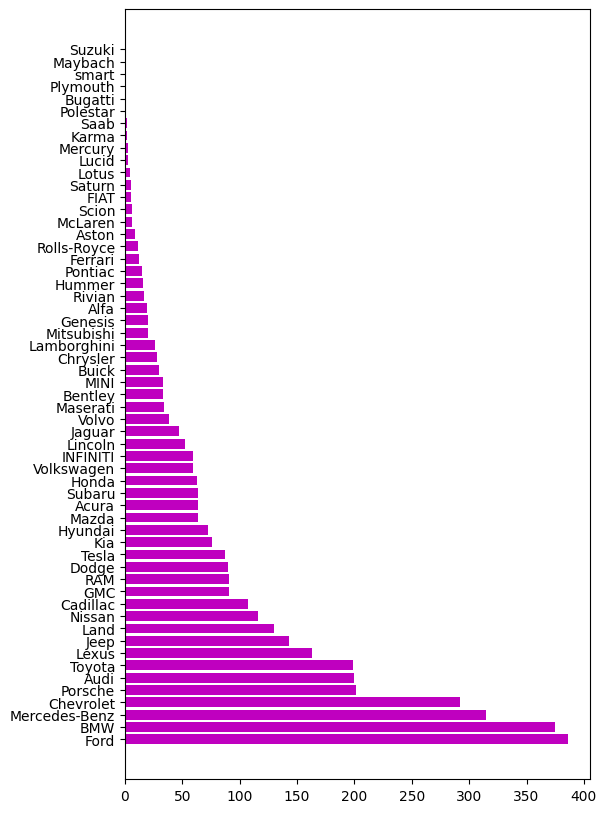

In [49]:
# Qual é a Marca de Carro Mais Comprada
carroMaisComprado = baseCarros['brand'].mode()[0]
listaMarcas = baseCarros['brand'].value_counts().reset_index(name='Quantidade')

# print(listaMarcas['brand'])

# # Resultados
# print(f'A Marca de Carro + Comprada foi {carroMaisComprado}')
# print('Lista de Marcas em Ordem Decrescente')
# display(listaMarcas)


# Gráficos
plt.figure(figsize=(6,10)) # Ajusta a Dimensão do Gráfico

# x, y = list(zip(*sorted(zip(prc, nm), reverse=True)))
# x, y = list(zip(*sorted(zip(listaMarcas['brand'], listaMarcas['Quantidade']), reverse=True)))
grafico = plt.barh(listaMarcas['brand'], listaMarcas['Quantidade'], color='m') # Cria o Gráfico de Barras na Horizontais
plt.show(grafico)

In [5]:
# Modelo de Carro + Comprado de Cada Marca
modeloMaisUsado = baseCarros['model'].mode()[0]

# Modelo Mais Usado
print(f'Modelo Mais Usado: {modeloMaisUsado}')

modeloMaisComprado = baseCarros.groupby(['brand','model']).size().reset_index(name='Quantidade')
# groupby: agrupa as colunas marca e modelo
# size: retorna a quantidade de vezes que cada modelo foi comprado e a marca
# reset_index: adiciona indices a essa tabela

modeloMaisCompradoPorMarca = modeloMaisComprado.loc[modeloMaisComprado.groupby('brand')['Quantidade'].idxmax()].sort_values(by='Quantidade',ascending=False).reset_index(drop=True)
# loc: mostra as linhas correspondentes aos modelos mais comprados por marca e a quantidade
# groupby('brand')['quantidade'].idxmax(): encontra o indice do modelo mais comprado, ou seja, de maior quantidade para cada marca
# sort_values: ordena a tabela em ordem crescente ou decrescente de acordo com a coluna especificada

print(f'{modeloMaisCompradoPorMarca}')

Modelo Mais Usado: M3 Base
            brand                        model  Quantidade
0             BMW                      M3 Base          30
1            Ford                    F-150 XLT          24
2       Chevrolet                Corvette Base          22
3             RAM                 1500 Laramie          18
4           Tesla           Model Y Long Range          17
5            Jeep               Wrangler Sport          17
6         Porsche                  911 Carrera          16
7   Mercedes-Benz                E-Class E 350          13
8          Toyota            Land Cruiser Base          12
9           Lexus                  ES 350 Base          12
10         Rivian        R1S Adventure Package          12
11           MINI                Cooper S Base          10
12         Hummer                      H2 Base           9
13         Nissan                 GT-R Premium           9
14           Land  Rover Range Rover Sport HSE           8
15           Audi         Q5 

In [6]:
# Tipo de Combustível  nos Carros mais Comprados
tipoCombustivel = baseCarros['fuel_type'].value_counts(normalize=True).map('{:.1%}'.format)
# formata o valor para ser mostrado em porcentagem

display(tipoCombustivel)



fuel_type
Gasoline          86.2%
Hybrid             5.1%
E85 Flex Fuel      3.6%
Diesel             3.0%
–                  1.2%
Plug-In Hybrid     0.9%
not supported      0.1%
Name: proportion, dtype: object

In [7]:
# Preço Médio dos Carros

# Formatando os dados da coluna Preço
baseCarros['new_price'] = baseCarros['price'].str.replace('$','').str.replace(',','.').str.replace('.','').astype(float)
# replace: troca o sifrão por um campo vazio e a vírgula por um ponto
#astype: converte a String para o tipo float

precoMedio = baseCarros['new_price'].mean()
# Mostrar o Preco Medio Considerando todos os carros

print('Medium Price: {:.2f}'.format(precoMedio))
# Média de Quilometros Rodados



Medium Price: 44553.19


In [8]:

# Cor Mais Comprada
corMaisComprada = baseCarros['ext_col'].value_counts(normalize=True).map('{:.1%}'.format)
display(corMaisComprada)

ext_col
Black                       22.6%
White                       20.4%
Gray                        12.4%
Silver                       9.3%
Blue                         8.7%
                            ...  
Anthracite Blue Metallic     0.0%
Moonlight Cloud              0.0%
Silver Mist                  0.0%
Cirrus Silver Metallic       0.0%
C / C                        0.0%
Name: proportion, Length: 319, dtype: object

In [11]:
# Carros por Ano_Modelo
ano_modelo = baseCarros['model_year'].value_counts()

display(ano_modelo)

model_year
2022    354
2021    350
2020    322
2018    315
2019    297
2016    268
2017    259
2015    228
2023    226
2014    181
2013    158
2012    141
2011    124
2008    113
2010    100
2007     98
2005     72
2009     72
2006     66
2004     60
2003     49
2001     34
2002     32
2000     17
1999     15
1998     11
1997      9
1993      9
1996      8
1994      7
2024      6
1995      6
1974      1
1992      1
Name: count, dtype: int64

In [10]:
# Média de Quilometros Rodados
baseCarros['new_milage'] = baseCarros['milage'].str.replace(',','').str.replace('mi.','').astype(float)

mediaKmRodados = baseCarros['new_milage'].mean()

print(f'Média de Kms Rodados: {mediaKmRodados:.3f} mil Km ')

Média de Kms Rodados: 64717.551 mil Km 
